## Portfolio Optimization

### Importing Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import scipy.optimize as optimize
import time

In [10]:
def fetch_data(assets):
    
    '''
    Parameters:
    
    assets: list 
    Takes in ticker symbols to be pulled from yfinance     
    
    Returns:
    
    df: Dataframe
    merged market data from yfinance
    '''
        
    count = 0
    df = pd.DataFrame()
    
    for asset in assets:
        temp_df = yf.download(asset)  # Downloading data for the current asset
        
        if temp_df.empty:
            print(f"No data returned for {asset}. Skipping.")
            continue
        
        # Rename columns to identify them by ticker name
        temp_df.columns = [f"{asset}_{col}" for col in temp_df.columns]
        
        if count == 0:
            df = temp_df  # First asset sets the base DataFrame
            count += 1
        else:
            df = pd.merge(df, temp_df, how='outer', left_index=True, right_index=True)
    
    if not df.empty:
        df = df.dropna()  # Drop rows with missing values
        return df
    else:
        return None  

#### Choosing a ticker symbols

In [11]:
stocks = ['TLT','GLD','SPY','QQQ','VWO']
data = fetch_data (stocks)

data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,TLT_Open,TLT_High,TLT_Low,TLT_Close,TLT_Adj Close,TLT_Volume,GLD_Open,GLD_High,GLD_Low,GLD_Close,...,QQQ_Low,QQQ_Close,QQQ_Adj Close,QQQ_Volume,VWO_Open,VWO_High,VWO_Low,VWO_Close,VWO_Adj Close,VWO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2005-03-10,88.739998,89.330002,88.389999,89.080002,48.239872,1357700.0,44.150002,44.250000,44.000000,44.200001,...,37.080002,37.520000,32.265823,97043600.0,25.150000,25.250000,24.975000,25.080000,15.144401,108200.0
2005-03-11,88.650002,88.870003,88.400002,88.430000,47.887901,1017900.0,44.310001,44.669998,44.279999,44.430000,...,37.020000,37.169998,31.964830,102857500.0,25.190001,25.315001,25.045000,25.049999,15.126284,184400.0
2005-03-14,88.370003,89.000000,88.300003,88.959999,48.174896,805000.0,44.259998,44.259998,43.950001,44.029999,...,37.029999,37.340000,32.111031,65576200.0,24.980000,25.055000,24.799999,24.900000,15.035710,112800.0
2005-03-15,89.290001,89.300003,88.400002,88.400002,47.871651,963900.0,44.230000,44.230000,43.930000,44.060001,...,36.990002,37.040001,31.853033,93856300.0,24.625000,24.680000,24.350000,24.360001,14.709630,127800.0
2005-03-16,88.540001,89.360001,88.540001,88.940002,48.164055,2097800.0,44.290001,44.349998,44.200001,44.310001,...,36.529999,36.619999,31.491856,159578000.0,24.315001,24.385000,24.125000,24.150000,14.582825,196400.0


#### Getting the Adjusted Closes

In [12]:
features = [f for f in list(data) if "_Adj" in f]
print(features)

['TLT_Adj Close', 'GLD_Adj Close', 'SPY_Adj Close', 'QQQ_Adj Close', 'VWO_Adj Close']


In [13]:
adj_closes = data[features]
list(adj_closes)

['TLT_Adj Close',
 'GLD_Adj Close',
 'SPY_Adj Close',
 'QQQ_Adj Close',
 'VWO_Adj Close']

#### Plotting the Adjusted Closes of each asset

<AxesSubplot: xlabel='Date'>

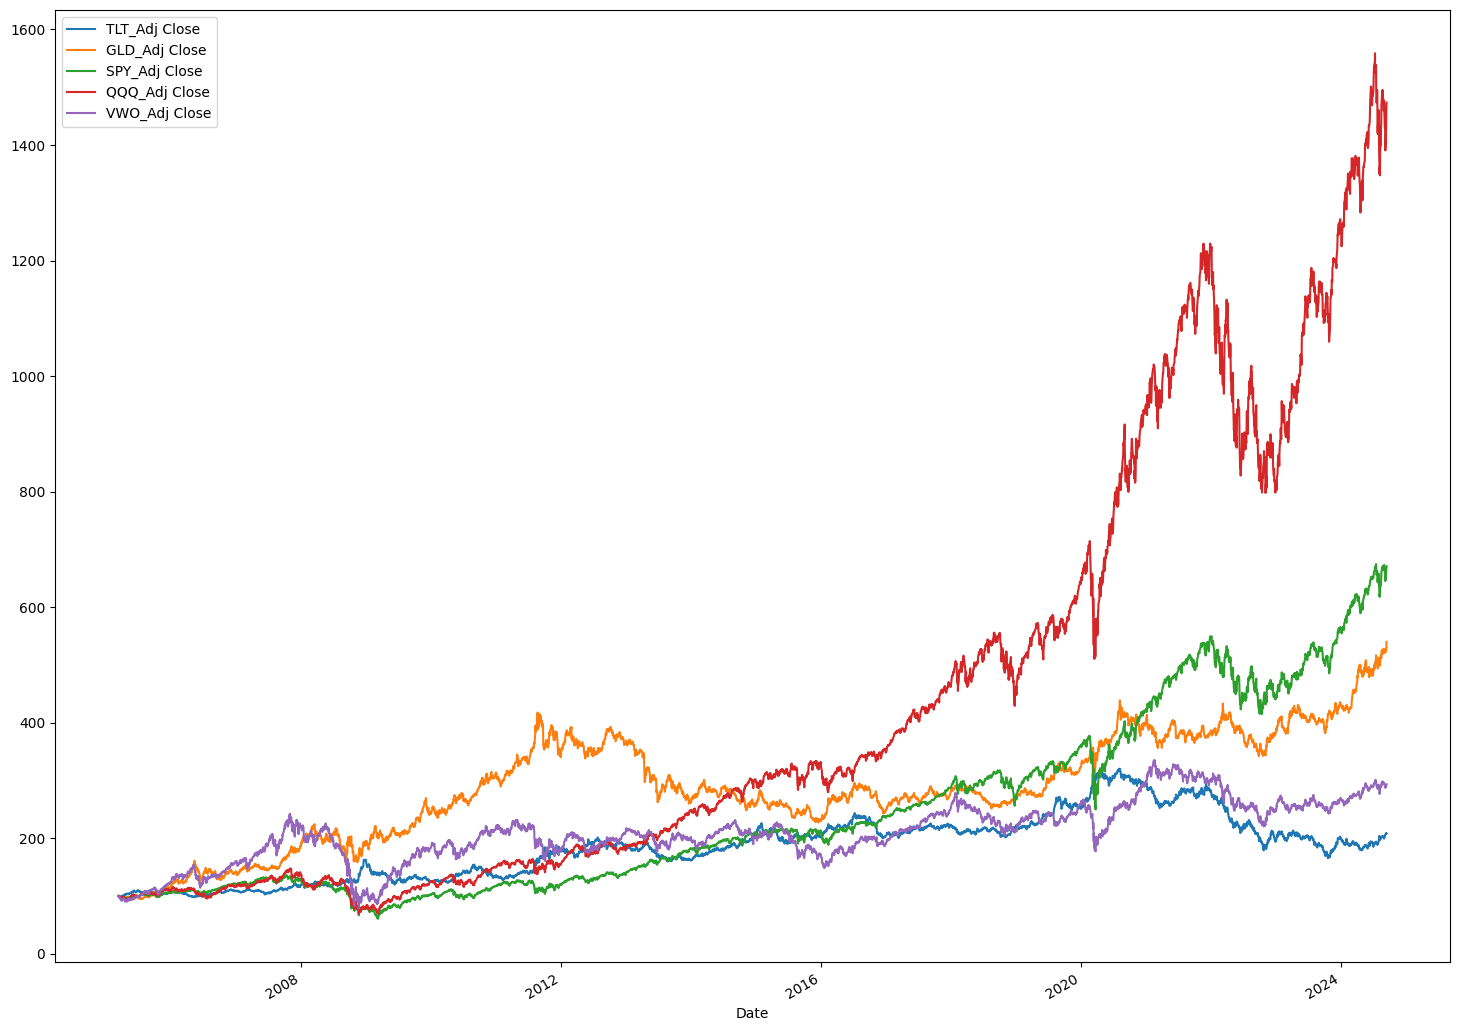

In [14]:
(adj_closes/adj_closes.iloc[0]*100).plot(figsize=(18,14))

#### Calculating daily average returns

In [15]:
returns = np.log(adj_closes/adj_closes.shift(1))
returns.mean()

TLT_Adj Close    0.000149
GLD_Adj Close    0.000343
SPY_Adj Close    0.000388
QQQ_Adj Close    0.000548
VWO_Adj Close    0.000219
dtype: float64

#### Annualizing returns

In [16]:
returns.mean() * 252

TLT_Adj Close    0.037612
GLD_Adj Close    0.086511
SPY_Adj Close    0.097673
QQQ_Adj Close    0.138042
VWO_Adj Close    0.055234
dtype: float64

In [17]:
returns.cov()

,TLT_Adj Close,GLD_Adj Close,SPY_Adj Close,QQQ_Adj Close,VWO_Adj Close
TLT_Adj Close,0.000087,0.000017,-0.000037,-0.000035,-0.000046
GLD_Adj Close,0.000017,0.000123,0.000008,0.000006,0.000034
SPY_Adj Close,-0.000037,0.000008,0.000146,0.000152,0.000168
QQQ_Adj Close,-0.000035,0.000006,0.000152,0.000187,0.000175
VWO_Adj Close,-0.000046,0.000034,0.000168,0.000175,0.000284


#### Annualizing covariance matrix

In [18]:
returns.cov() * 252

,TLT_Adj Close,GLD_Adj Close,SPY_Adj Close,QQQ_Adj Close,VWO_Adj Close
TLT_Adj Close,0.022030,0.004349,-0.009381,-0.008803,-0.011469
GLD_Adj Close,0.004349,0.031118,0.001936,0.001573,0.008461
SPY_Adj Close,-0.009381,0.001936,0.036891,0.038226,0.042318
QQQ_Adj Close,-0.008803,0.001573,0.038226,0.047004,0.043981
VWO_Adj Close,-0.011469,0.008461,0.042318,0.043981,0.071477


#### Generating a random array of weights

In [19]:
num_assets = len(stocks)
weights = np.random.dirichlet(np.ones(num_assets), size=1)
weights = weights[0]
print(weights)

[0.11520841 0.17030554 0.42799464 0.02321935 0.26327206]


#### Expected weighted return using random weights

In [20]:
exp_port_return = np.sum(returns.mean()*weights)*252
print(exp_port_return)

0.07861650591278808


#### Calculating portfolio variance

In [21]:
port_var = np.dot(weights.T, np.dot(returns.cov()*252, weights))
port_vol = np.sqrt(port_var)
print(port_var)
print(port_vol)

0.02332234383111911
0.15271654733891515


#### Combining previous steps into one function that calculates a portfolios mean return and portfolio volatility

In [22]:
def portfolio_simulation(assets, iterations):
    '''
    Runs a simulation by randomly selecting portfolio weights a specified
    number of iterations, returns the list of results and plots all the portfolios.
    
    Parameters:
    
    assets: list
    All the assets that are to be pulled from yfinance that make up the portfolio.    
    
    iterations: int 
    Number of randomly generated portfolios to build.
    
    Returns:
    
    port_returns: array
    Array of all the simulated portfolio returns.
    
    port_vols: array
    Array of all the simulated portfolio volatilities.
    
    '''
    
    start = time.time()
    num_assets = len(assets)
    
    # Calling fetch function to get data  
    df = fetch_data(assets)
    
    features = [f for f in list(data) if "_Adj" in f]
    # adj_closes = df[features]
    adj_closes = df[features].dropna()
    returns = np.log(adj_closes / adj_closes.shift(1))
    
    port_returns = []
    port_vols = []

    # print(returns.head())
    # print(adj_closes.head())
    
    for i in range (iterations):
        weights = np.random.dirichlet(np.ones(num_assets),size=1)
        weights = weights[0]
        port_returns.append(np.sum(returns.mean() * weights) * 252)
        port_vols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))))
    

    port_returns = np.array(port_returns)
    port_vols = np.array(port_vols)
 
    
    # Plotting distribution of portfolio returns/volatilities 
    plt.figure(figsize = (18,10))
    plt.scatter(port_vols,port_returns,c = (port_returns / port_vols), marker='o')
    plt.xlabel('Portfolio Volatility')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label = 'Sharpe ratio (without risk-free rate)')
    
    print('Elapsed Time: %.2f seconds' % (time.time() - start))
    
    return port_returns, port_vols

#### Randomly generating portfolios (Assuming risk-free rate is 0)
#### Markowitz Bullet

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Elapsed Time: 2.39 seconds


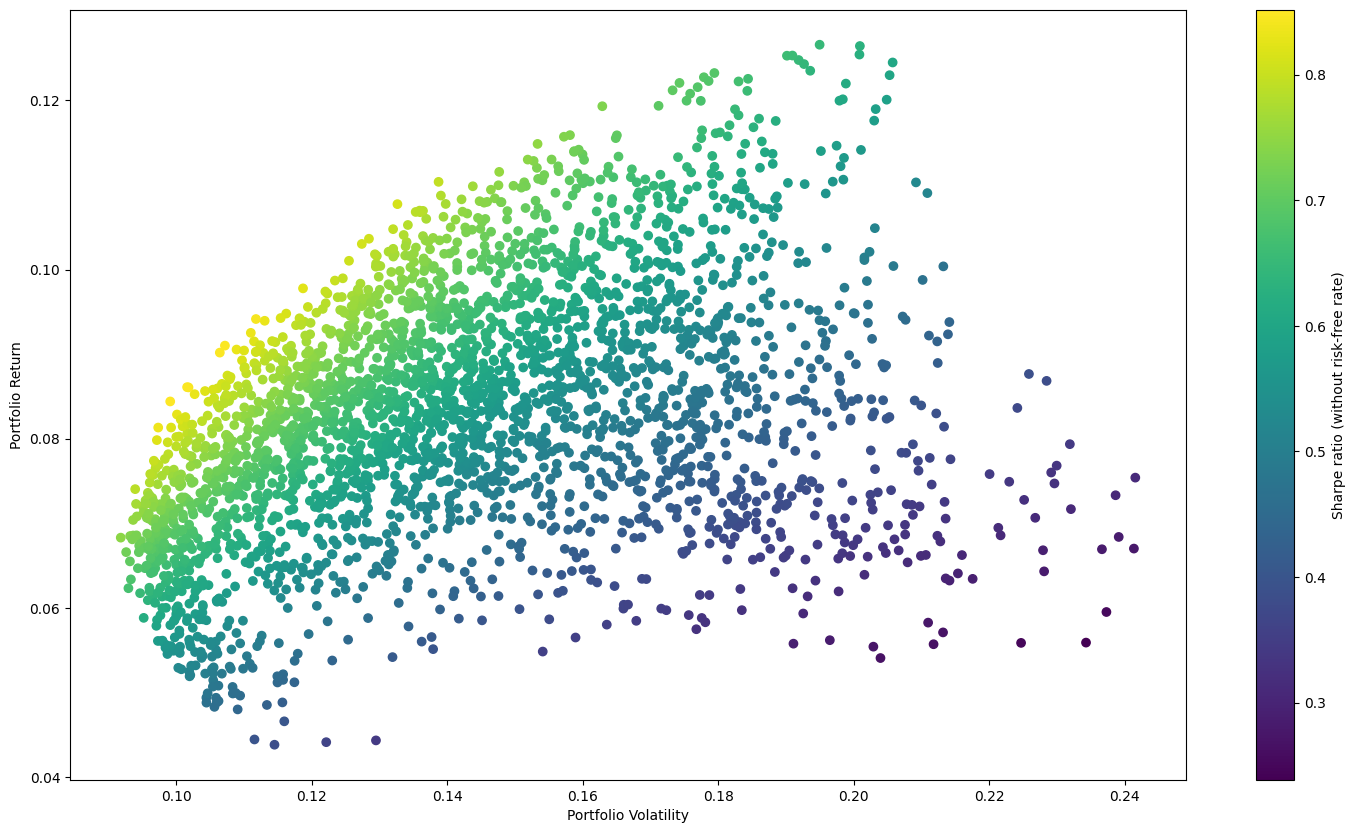

In [23]:
assets = ['TLT','GLD','SPY','QQQ','VWO']
port_returns, port_vols = portfolio_simulation(assets, 3000)

#### Creating a function to help optimize based on: Sharpe Ratio, Variance/Risk, and Return

In [24]:
def portfolio_stats(weights, returns):
    
    '''
    Gathering the portfolio performance metrics for a set of weights 
    (Using a risk-free short rate of 0)
    
    Paramaters: 

    weights: array 
    weights of assets in the portfolio
    
    returns: dataframe
    returns for each asset in the portfolio    
    
    Returns:
    
    dict of portfolio mean return, volatility, sharp ratio
    
    '''

    weights = np.array(weights)
    
    port_return = np.sum(returns.mean() * weights) * 252
    port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe = port_return/port_vol

    return {'return': port_return, 'volatility': port_vol, 'sharpe': sharpe}

#### Adding Minimization Functions

In [34]:
def minimize_sharpe(weights, returns):  
    return -portfolio_stats(weights, returns)['sharpe'] 

def minimize_volatility(weights, returns):  
    return portfolio_stats(weights, returns)['volatility'] 

def minimize_return(weights, returns): 
    return -portfolio_stats(weights, returns)['return']

In [35]:
constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
# bounds: a single stock can take up a maximum of 20% of the portfolio
bounds = tuple((0,1) for x in range(num_assets))
# initializer: initial weights as a starting point
initializer = num_assets * [1./num_assets,]

print (initializer)
print (bounds)

[0.2, 0.2, 0.2, 0.2, 0.2]
((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))


In [36]:
optimal_sharpe = optimize.minimize(minimize_sharpe,
                                   initializer,
                                   args=(returns,),  # Pass the 'returns' here
                                   method='SLSQP',
                                   bounds=bounds,
                                   constraints=constraints)
print(optimal_sharpe)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.8686444134969152
       x: [ 3.178e-01  2.738e-01  7.503e-17  4.084e-01  0.000e+00]
     nit: 6
     jac: [ 7.247e-04 -4.134e-04  9.673e-02 -2.867e-04  7.662e-01]
    nfev: 36
    njev: 6
